In [30]:
import numpy as np
from numpy import nan

#Pandas is used for data processing, reading the CSV File
import pandas as pd

#Matplotlib and Seaborn is used for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove any warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
df = pd.read_excel('data//overallShoeData_converted.xlsx')

# Data Exploration

In [32]:
df.shape

(215, 8)

215 Rows and 8 Columns


In [33]:
df.columns

Index(['Shoe Name', 'Shoe Price', 'Shoe link', 'User', 'User Rating',
       'Review Header', 'Review Description', 'Date Published'],
      dtype='object')

Columns consist of
- "Shoe Name"
- "Shoe Price"
- "Shoe link"
- "User"
- "User Rating"
- "Review Header"
- "Review Description"
- "Date Published"


In [34]:
df.describe()

,Shoe Price,User Rating,Date Published
count,215.000000,215.000000,215
mean,149.302326,4.302326,2022-11-29 16:11:09.767441920
min,85.000000,1.000000,2016-06-05 00:00:00
25%,160.000000,4.000000,2023-01-14 00:00:00
50%,160.000000,5.000000,2023-04-21 00:00:00
75%,160.000000,5.000000,2023-08-18 00:00:00
max,160.000000,5.000000,2023-09-19 00:00:00
std,25.998324,1.313746,NaN


In [35]:
#We can preview the first 5 rows of the dataset
df.head()

,Shoe Name,Shoe Price,Shoe link,User,User Rating,Review Header,Review Description,Date Published
0,Jordan Retro 6,160,https://www.footlocker.com/product/jordan-retr...,DustinC8301038,1,Fit way WAY to big!!!,Got a pair of red Oreo’s in a 5.5 still can’t ...,2023-09-17
1,Jordan Retro 6,160,https://www.footlocker.com/product/jordan-retr...,Lida0224,5,Perfect for our wedding!!,I bought this for myself for our wedding in Fe...,2023-09-06
2,Jordan Retro 6,160,https://www.footlocker.com/product/jordan-retr...,Kiki7,5,Great,Bought it few weeks ago for my daughter first ...,2023-08-29
3,Jordan Retro 6,160,https://www.footlocker.com/product/jordan-retr...,CharniceB738939865,5,Jordan Retro 6 - Boys' Grade School Casual Bas...,true color and overall excellent shoe true siz...,2023-08-29
4,Jordan Retro 6,160,https://www.footlocker.com/product/jordan-retr...,Matildas191380093,5,Awesome,Love them insole soft and cushioned and perfec...,2023-08-28


# Data Visualization

Text(0, 0.5, 'Frequency')

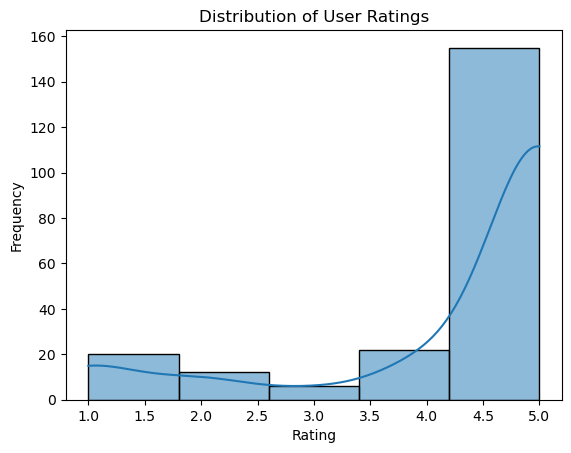

In [36]:
sns.histplot(df['User Rating'], bins=5, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Histogram of User Ratings

- **High Rating Bias:** A significant majority of the ratings are clustered around the maximum score of 5.0. This suggests that most users are very satisfied with their purchases or the products they're reviewing.

- **Sparse Low Ratings:** There are minimal ratings in the lower range (from 3.0 to about 4.25), indicating that negative feedback or dissatisfaction among users is quite rare for the products in the dataset.

- **Skewness:** The distribution is left-skewed, implying that there are fewer low ratings compared to high ratings.

- **Potential Ceiling Effect:** Since a significant portion of ratings is at the maximum value (5.0), it might be indicative of a ceiling effect, where users might want to give a rating slightly higher than 5.0 if it were possible.

- **Peak at 5.0:** The sharp peak at the 5.0 rating suggests either an overwhelmingly positive reception of the products or a potential bias in the collection or reporting of ratings. Some factors to consider could be:

Users may only be motivated to leave a review if they had an exceptionally good experience.
There could be incentives for leaving positive reviews.
Negative reviews might be filtered or not displayed.
General Satisfaction: If we assume the data is representative and without external biases, it conveys that users are generally very satisfied with the products they're reviewing.

In conclusion, while the histogram provides a positive picture regarding user satisfaction, it's essential to consider external factors that might influence such a distribution and ensure that it accurately represents the broader customer base.

Text(0.5, 0, 'Number of Reviews')

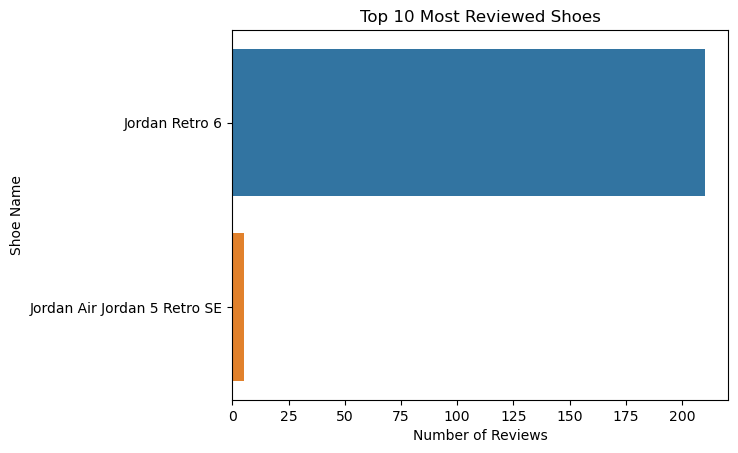

In [37]:
sns.countplot(y='Shoe Name', data=df, order=df['Shoe Name'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Reviewed Shoes')
plt.xlabel('Number of Reviews')

Text(0, 0.5, 'Frequency')

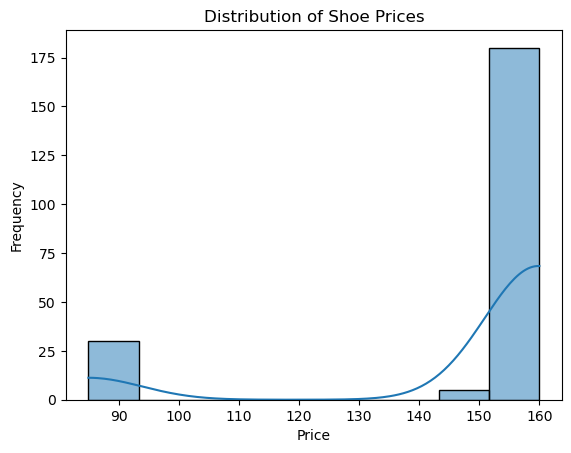

In [38]:
sns.histplot(df['Shoe Price'], kde=True)
plt.title('Distribution of Shoe Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Distribution of Shoe Prices

*****Relationships*****

Text(0.5, 1.0, 'Shoe Price Distribution by User Rating')

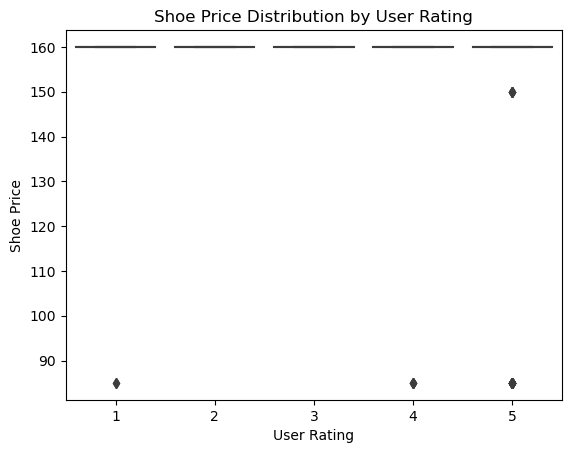

In [39]:
sns.boxplot(x='User Rating', y='Shoe Price', data=df)
plt.title('Shoe Price Distribution by User Rating')

Box plot of Shoe Prices vs User Ratings (to see if higher-priced shoes get better ratings)

Text(0, 0.5, 'Number of Reviews')

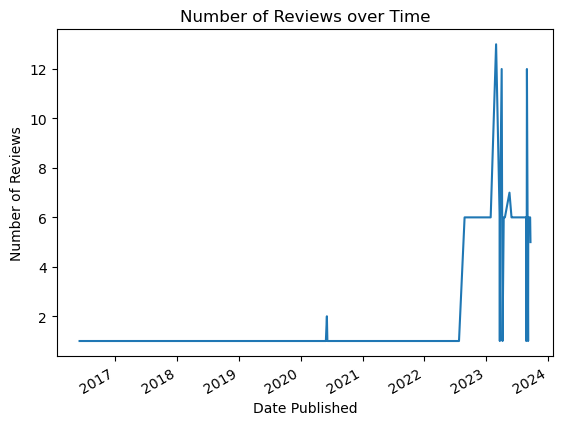

In [40]:
# First, convert 'Date Published' to datetime type
df['Date Published'] = pd.to_datetime(df['Date Published'])

# Group by date and count reviews
reviews_over_time = df.groupby('Date Published').size()

# Plot
reviews_over_time.plot()
plt.title('Number of Reviews over Time')
plt.ylabel('Number of Reviews')

Number of Reviews over Time (to see if the number of reviews has been increasing or decreasing):

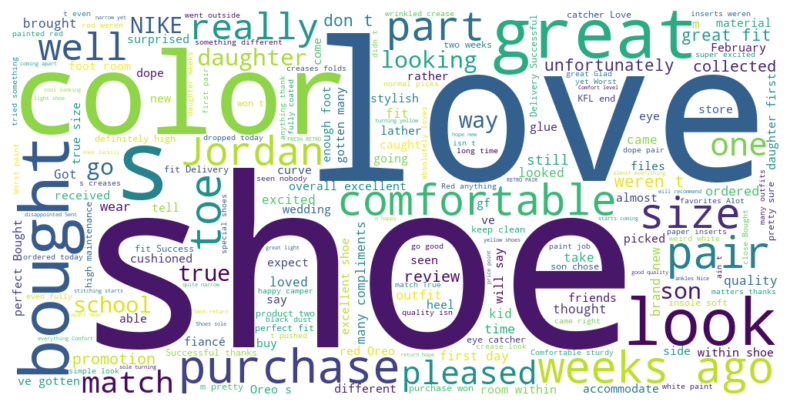

In [41]:
from wordcloud import WordCloud

# Combine all review descriptions into one text
text = " ".join(review for review in df['Review Description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK datasets
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Tokenize and POS tag
def extract_adjectives(text):
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    
    # Filter out the adjectives (JJ, JJR, JJS are tags for adjectives)
    adjectives = [word for word, tag in tags if tag in ['JJ', 'JJR', 'JJS']]
    
    return ' '.join(adjectives)

# Combine all review descriptions into one text
all_reviews = " ".join(review for review in df['Review Description'].dropna())

# Get the adjectives
adjectives_text = extract_adjectives(all_reviews)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DESKTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DESKTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DESKTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


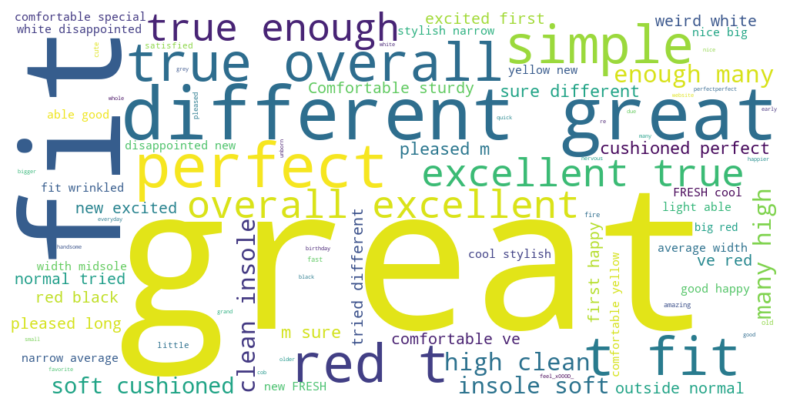

In [43]:
# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(adjectives_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Shoe Name')

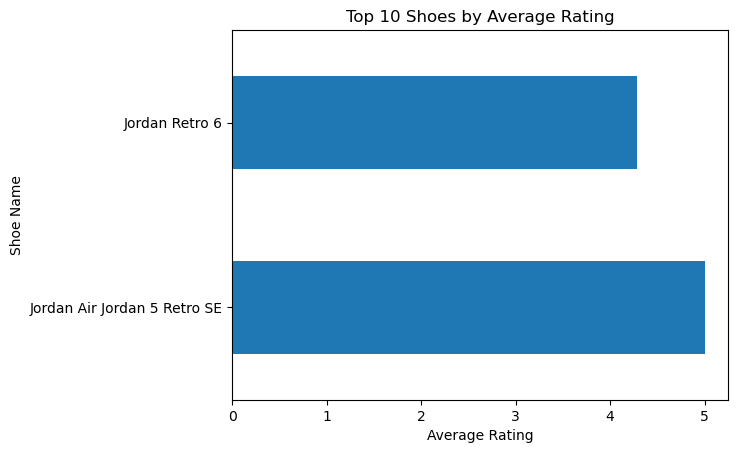

In [44]:
avg_rating = df.groupby('Shoe Name')['User Rating'].mean().sort_values(ascending=False).head(10)
avg_rating.plot(kind='barh')
plt.title('Top 10 Shoes by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Shoe Name')

# Data Cleaning

### Handling Missing Data
Check for any missing values:

In [45]:
missing_values = df.isnull().sum()
print(missing_values)

Shoe Name             0
Shoe Price            0
Shoe link             0
User                  0
User Rating           0
Review Header         0
Review Description    0
Date Published        0
dtype: int64


The data does not have any missing values

### Removing Duplicates
Check and remove any duplicate rows:

In [46]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of           Shoe Name  Shoe Price  \
0    Jordan Retro 6         160   
1    Jordan Retro 6         160   
2    Jordan Retro 6         160   
3    Jordan Retro 6         160   
4    Jordan Retro 6         160   
..              ...         ...   
210  Jordan Retro 6          85   
211  Jordan Retro 6          85   
212  Jordan Retro 6          85   
213  Jordan Retro 6          85   
214  Jordan Retro 6          85   

                                             Shoe link                User  \
0    https://www.footlocker.com/product/jordan-retr...      DustinC8301038   
1    https://www.footlocker.com/product/jordan-retr...            Lida0224   
2    https://www.footlocker.com/product/jordan-retr...               Kiki7   
3    https://www.footlocker.com/product/jordan-retr...  CharniceB738939865   
4    https://www.footlocker.com/product/jordan-retr...   Matildas191380093   
..                                                 ...              

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.shape

(65, 8)

After cleaning the duplicates, we have 65 rows left

### Handling Emojis
The management of emojis within textual data can be helpful in textual analytics. As such, we will be converting them into strings that can provide useful sentiments.

In [64]:
import emoji

def convert_emojis(text):
    return emoji.demojize(text)

In [65]:
df['Review Description'] = df['Review Description'].apply(lambda x: convert_emojis(str(x)))

# Exporting the cleaned data

In [69]:
df.to_excel('overallShoeData_CLEANED.xlsx', engine='openpyxl', index=False)